## Predicting Wind Turbine Power Output from Wind Speed Values: A Model

### 1. Introduction
In this notebook I will use machine learning to create a model that accurately predicts wind turbine power output from wind-speed values. The values in the "powerproduction" dataset will be used to train and test the model.

### 2. Import Required Packages

In [4]:
# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# neural neworks
import tensorflow.keras as kr


### 3. Read in Data and Create Plot

<AxesSubplot:xlabel='speed', ylabel='power'>

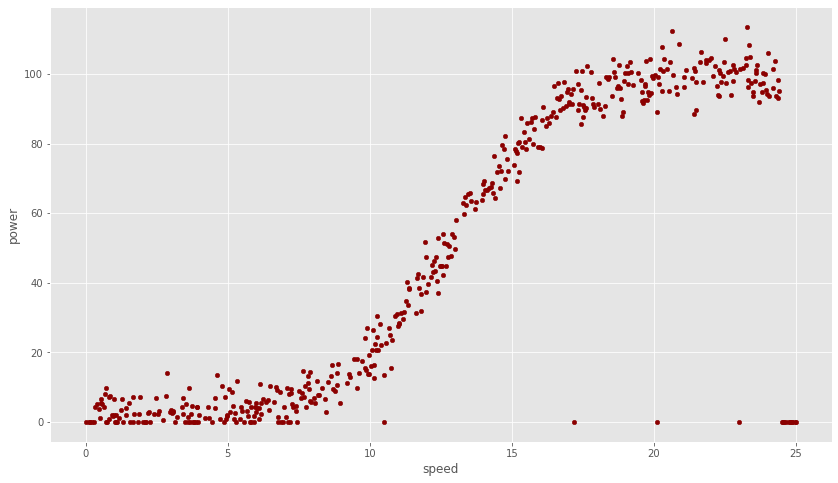

In [6]:
data = pd.read_csv('power_production.csv')

# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

data.plot.scatter(x='speed',y='power',c='DarkRed')

### 4. The S-Shaped Curve, Data Limits and Outliers

   We can see that the curve produced by plotting wind-speed against power output is s-shaped. This suggests that power output is quite small at low wind speeds, climbs sharply after a certain speed and then much more slowly before it reaches 
a maximum. It seems that the s-shaped sigmoid curve has previously been used to model power production from wind turbines.[1][2]
    The distinctive shape of the graph is explained by [this article](https://now.tufts.edu/articles/how-do-windmills-create-electricity)[3] on how windmills create energy[4]. It seems that if the turbine is moving below a certain rate, electricity is not created. Energy starts to be created at what is known as the cut-in speed. After the cut-in point energy is created at a fast rate but this rate starts to slow as it reaches its maximum rated wind speed. Beyond this point, the power output remains quite stable. We can see this as the top of the s-shape in the graph.  
    Wind turbines also have a cut-out speed, at which a brake stops the turbine's rotation. This may explain why, in this data, wind speeds greater than approximately 24 seem to produce zero power. I will remove these points from the model. There are also some outliers on the graph whereby, unexpectedly, zero power output is produced.I concluded that these may have been caused by faults and will also remove these data points.   


<AxesSubplot:xlabel='speed', ylabel='power'>

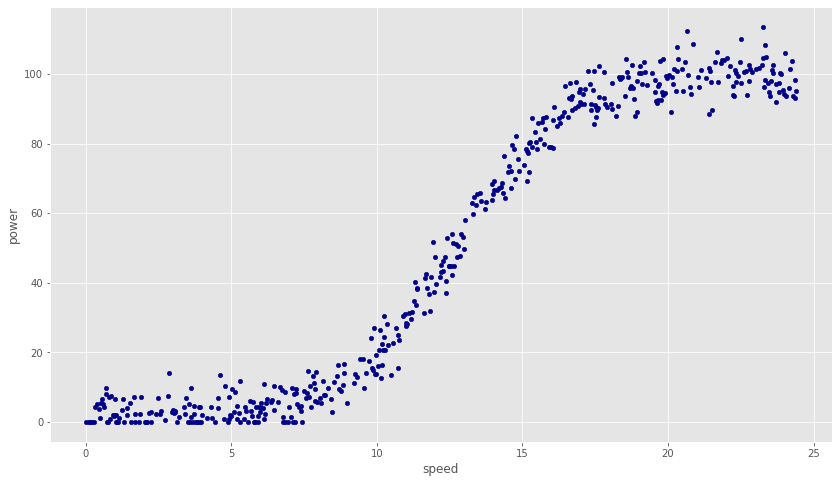

In [13]:
# drop rows where the power putput is zero even though wind speed > 10
# adapted from stack overflow https://stackoverflow.com/questions/52456874/drop-rows-on-multiple-conditions-in-pandas-dataframe
df_new = data.drop(data[(data['speed'] > 10.0) & (data['power'] == 0.0)].index)   
df_new.plot.scatter(x='speed',y='power',c='DarkBlue')

### 5. Training the Model

In [50]:
# partition into test and train data
# code from https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
msk = np.random.rand(len(df_new)) < 0.8
train = df_new[msk]
test = df_new[~msk]

# extract x and y values from the train and test data
train_x = train.iloc[:,0]
train_y = train.iloc[:,1]
test_x = test.iloc[:,0]
test_y = test.iloc[:,1]


In [21]:
# Train a model.Code adapted from "Machine Learning and Statistics" lecture: Regression in Keras
m = kr.models.Sequential()
m.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
m.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
m.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [53]:
# Fit the data.
m.fit(train_x, train_y, epochs=500, batch_size=10)

Epoch 1/500
40/40 [==============================] - 0s 2ms/step - loss: 4073.5054
Epoch 2/500
40/40 [==============================] - 0s 2ms/step - loss: 3903.4644
Epoch 3/500
40/40 [==============================] - 0s 2ms/step - loss: 3739.3652
Epoch 4/500
40/40 [==============================] - 0s 1ms/step - loss: 3561.3848
Epoch 5/500
40/40 [==============================] - 0s 1ms/step - loss: 3367.2510
Epoch 6/500
40/40 [==============================] - 0s 1ms/step - loss: 3192.3821
Epoch 7/500
40/40 [==============================] - 0s 1ms/step - loss: 3045.3213
Epoch 8/500
40/40 [==============================] - 0s 1ms/step - loss: 2906.8262
Epoch 9/500
40/40 [==============================] - 0s 1ms/step - loss: 2788.4795
Epoch 10/500
40/40 [==============================] - 0s 1ms/step - loss: 2683.8984
Epoch 11/500
40/40 [==============================] - 0s 1ms/step - loss: 2589.8118
Epoch 12/500
40/40 [==============================] - 0s 1ms/step - loss: 2502.2385
E

Epoch 99/500
40/40 [==============================] - 0s 1ms/step - loss: 153.6299
Epoch 100/500
40/40 [==============================] - 0s 1ms/step - loss: 148.9271
Epoch 101/500
40/40 [==============================] - 0s 1ms/step - loss: 146.4743
Epoch 102/500
40/40 [==============================] - 0s 1ms/step - loss: 141.0603
Epoch 103/500
40/40 [==============================] - 0s 1ms/step - loss: 137.7430
Epoch 104/500
40/40 [==============================] - 0s 1ms/step - loss: 133.5793
Epoch 105/500
40/40 [==============================] - 0s 1ms/step - loss: 130.3541
Epoch 106/500
40/40 [==============================] - 0s 1ms/step - loss: 126.8268
Epoch 107/500
40/40 [==============================] - 0s 1ms/step - loss: 123.5733
Epoch 108/500
40/40 [==============================] - 0s 1ms/step - loss: 120.7801
Epoch 109/500
40/40 [==============================] - 0s 1ms/step - loss: 118.0213
Epoch 110/500
40/40 [==============================] - 0s 1ms/step - loss: 11

40/40 [==============================] - 0s 1ms/step - loss: 45.2501
Epoch 198/500
40/40 [==============================] - 0s 1ms/step - loss: 44.9740
Epoch 199/500
40/40 [==============================] - 0s 1ms/step - loss: 44.4660
Epoch 200/500
40/40 [==============================] - 0s 1ms/step - loss: 44.2361
Epoch 201/500
40/40 [==============================] - 0s 1ms/step - loss: 43.7837
Epoch 202/500
40/40 [==============================] - 0s 1ms/step - loss: 43.3334
Epoch 203/500
40/40 [==============================] - 0s 1ms/step - loss: 42.9968
Epoch 204/500
40/40 [==============================] - 0s 1ms/step - loss: 42.5564
Epoch 205/500
40/40 [==============================] - 0s 1ms/step - loss: 42.4179
Epoch 206/500
40/40 [==============================] - 0s 1ms/step - loss: 42.3039
Epoch 207/500
40/40 [==============================] - 0s 1ms/step - loss: 41.6627
Epoch 208/500
40/40 [==============================] - 0s 1ms/step - loss: 41.1214
Epoch 209/500
40/4

40/40 [==============================] - 0s 1ms/step - loss: 18.8678
Epoch 394/500
40/40 [==============================] - 0s 1ms/step - loss: 18.7096
Epoch 395/500
40/40 [==============================] - 0s 1ms/step - loss: 18.9454
Epoch 396/500
40/40 [==============================] - 0s 1ms/step - loss: 18.6387
Epoch 397/500
40/40 [==============================] - 0s 1ms/step - loss: 18.6696
Epoch 398/500
40/40 [==============================] - 0s 1ms/step - loss: 18.5311
Epoch 399/500
40/40 [==============================] - 0s 1ms/step - loss: 18.5039
Epoch 400/500
40/40 [==============================] - 0s 1ms/step - loss: 18.8771
Epoch 401/500
40/40 [==============================] - 0s 1ms/step - loss: 18.5598
Epoch 402/500
40/40 [==============================] - 0s 1ms/step - loss: 18.6437
Epoch 403/500
40/40 [==============================] - 0s 1ms/step - loss: 18.5951
Epoch 404/500
40/40 [==============================] - 0s 1ms/step - loss: 18.5369
Epoch 405/500
40/4

40/40 [==============================] - 0s 1ms/step - loss: 17.5074
Epoch 492/500
40/40 [==============================] - 0s 951us/step - loss: 17.4745
Epoch 493/500
40/40 [==============================] - 0s 1ms/step - loss: 17.6827
Epoch 494/500
40/40 [==============================] - 0s 1ms/step - loss: 17.4138
Epoch 495/500
40/40 [==============================] - 0s 1ms/step - loss: 17.6682
Epoch 496/500
40/40 [==============================] - 0s 1ms/step - loss: 17.5395
Epoch 497/500
40/40 [==============================] - 0s 1ms/step - loss: 17.5124
Epoch 498/500
40/40 [==============================] - 0s 1ms/step - loss: 17.6048
Epoch 499/500
40/40 [==============================] - 0s 1ms/step - loss: 17.5605
Epoch 500/500
40/40 [==============================] - 0s 1ms/step - loss: 17.5265


### 6. Evaluate Accuracy of Model

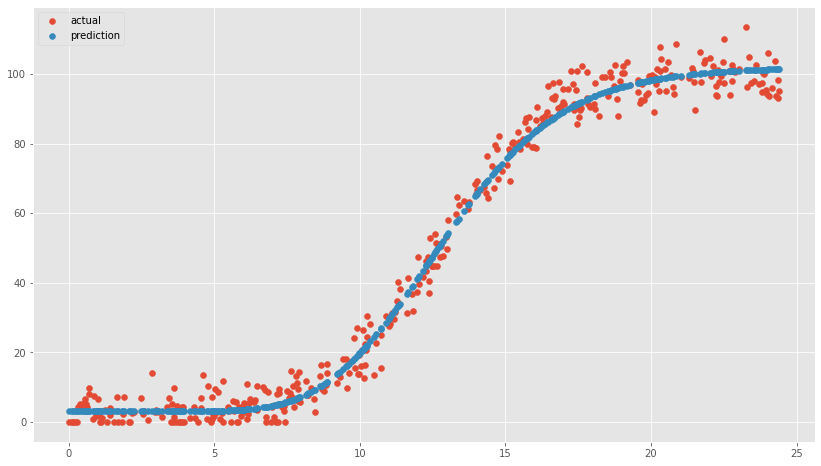

In [56]:
# Compare model to data 
plt.scatter(train_x, train_y, label='actual')
plt.scatter(train_x, m.predict(train_x), label='prediction')
plt.legend();

It seems that the curve provided by the model fits the data quite well. We make predictions below and find that the predicted values for power output seem to match the actual output values.

In [10]:
# Take four hand-picked values and see their predictions.
m.predict([1.0,5.0,10.0,15.0, 20.0])

array([[ 2.882759 ],
       [ 3.4328802],
       [21.338326 ],
       [76.8146   ],
       [98.53489  ]], dtype=float32)

Below, we can see a plot of the model against data for the test values. Again we see a good fit. The evaluation of the neural network on the test data gives a loss value tat is evidence of an accurate model. 

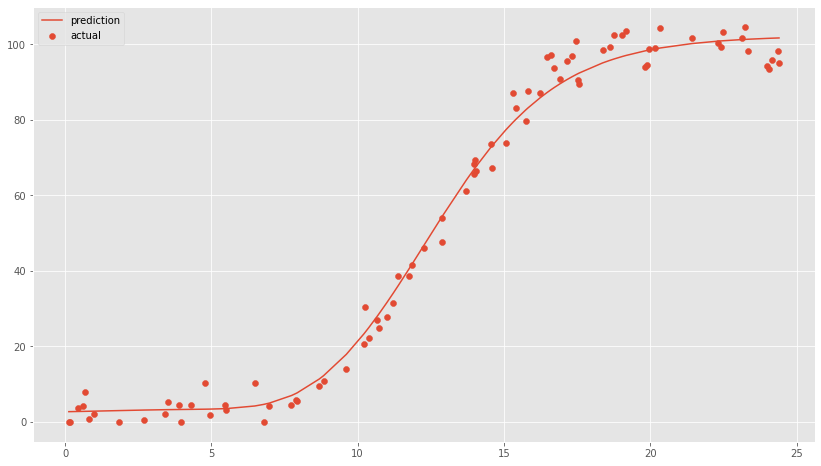

In [11]:
# Let's plot our predictions of the x values we kept for testing
plt.scatter(test_x, test_y, label='actual')
plt.plot(test_x, m.predict(test_x), label='prediction')
plt.legend();

In [65]:
# Evaluate the neural network on the test data.
m.evaluate(test_x, test_y)

3/3 [==============================] - 0s 2ms/step - loss: 18.8318


18.831802368164062

### References:
1. Production of Wind and Solar: Cyriel de Jong (2020) https://www.kyos.com/wp-content/uploads/2020/05/Production-patterns-of-wind-and-solar-the-financials-of-renewable-power-and-PPA-contracts.pdf
2. Sigmoid Function: Wkipedia https://en.wikipedia.org/wiki/Sigmoid_function
3. How can windmills create electricity if they’re so often moving slowly?: Luisa Chiesa  https://now.tufts.edu/articles/how-do-windmills-create-electricity
4.  Wind energy's frequently asked questions (FAQ) https://www.ewea.org/wind-energy-basics/faq/#:~:text=The%20output%20of%20a%20wind,average%20EU%20households%20with%20electricity.
5. Keras Documentation: Introduction to Keras for Engineers https://keras.io/getting_started/intro_to_keras_for_engineers/

### End